In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_df = pd.read_csv("train_data.txt",sep=':::', names=['Movie','Genre','Description'],engine='python')
train_df.head()


,Movie,Genre,Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [3]:
test_df = pd.read_csv("test_data.txt",sep=':::',names=['Movie','Description'],engine='python')
test_df.head()

,Movie,Description
1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
5,Er nu zhai (1955),Before he was known internationally as a mart...


In [4]:
train_df.shape

(54214, 3)

In [5]:
test_df.shape

(54200, 2)

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54214 entries, 1 to 54214
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Movie        54214 non-null  object
 1   Genre        54214 non-null  object
 2   Description  54214 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54200 entries, 1 to 54200
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Movie        54200 non-null  object
 1   Description  54200 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB


In [8]:
train_df.isnull().sum()

Movie          0
Genre          0
Description    0
dtype: int64

In [9]:
test_df.isnull().sum()

Movie          0
Description    0
dtype: int64

In [10]:
train_df['Genre'].value_counts()

Genre
 drama           13613
 documentary     13096
 comedy           7447
 short            5073
 horror           2204
 thriller         1591
 action           1315
 western          1032
 reality-tv        884
 family            784
 adventure         775
 music             731
 romance           672
 sci-fi            647
 adult             590
 crime             505
 animation         498
 sport             432
 talk-show         391
 fantasy           323
 mystery           319
 musical           277
 biography         265
 history           243
 game-show         194
 news              181
 war               132
Name: count, dtype: int64

In [11]:
train_df['Movie'].nunique()

54214

In [12]:
train_df.duplicated().sum()

0

In [13]:
test_df.duplicated().sum()

0

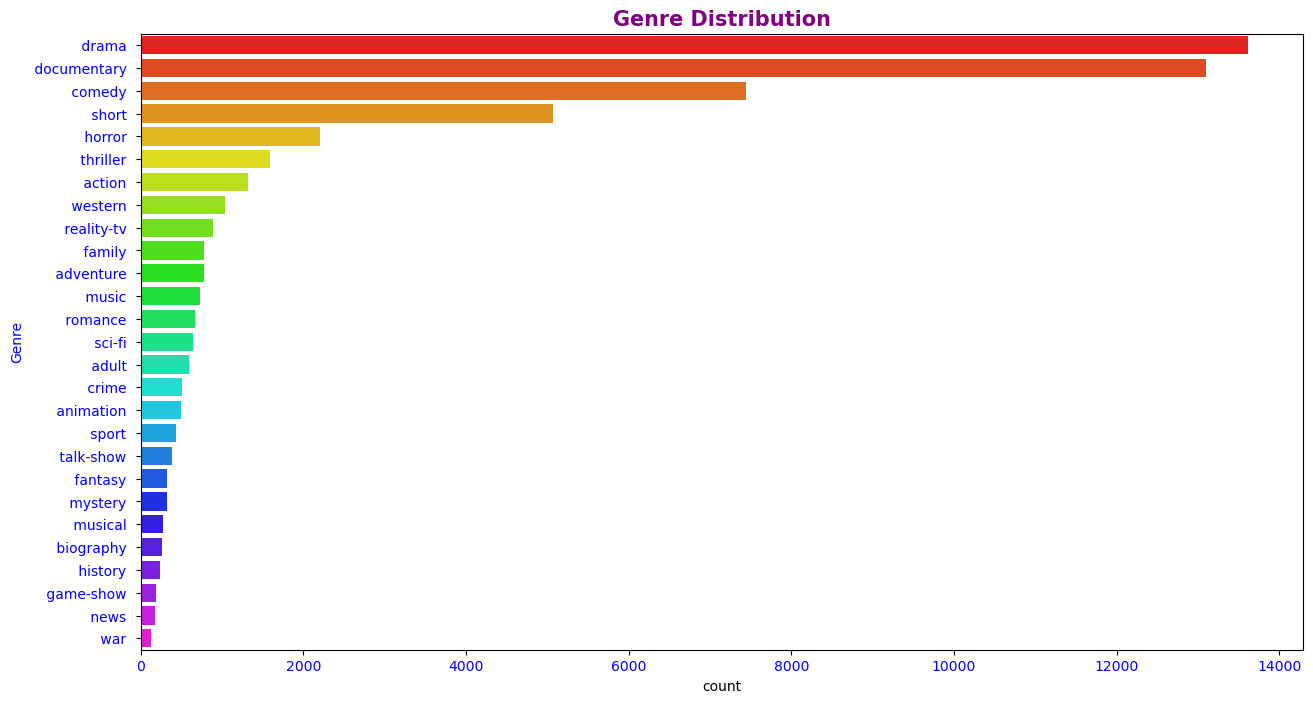

In [14]:
plt.figure(figsize=(15,8))
sns.countplot(y='Genre',data=train_df,order=train_df['Genre'].value_counts().index,palette='gist_rainbow')
plt.title("Genre Distribution",color='purple',fontsize=15,fontweight='bold')
plt.xticks(color='blue')
plt.ylabel("Genre",color='blue')
plt.yticks(color='blue');
#plt.xticks(rotation=45,color='blue');

In [15]:
train_df.groupby(['Genre','Movie']).count()

Description
Genre     Movie                                             
 action    "A Girl Is a Gun" (2017)                        1
           "A Stressful Year" (2016)                       1
           "A Swordsman in Wilderness" (2011)              1
           "Air Force One Is Down" (2013)                  1
           "Alex Reed" (2017)                              1
...                                                      ...
 western   Yodelin' Kid from Pine Ridge (1937)             1
           Young Fury (1964)                               1
           Zandy's Bride (1974)                            1
           Zorro alla corte di Spagna (1962)               1
           Zorro's Black Whip (1944)                       1

[54214 rows x 1 columns]

### Data Pre-Processing

In [16]:
import nltk

In [17]:
import re
import string
from nltk.corpus import stopwords
from string import punctuation
nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Lower Case Conversion

In [18]:
train_df['Description'] = train_df['Description'].str.lower()
test_df['Description'] = test_df['Description'].str.lower()

In [19]:
train_df.head()

,Movie,Genre,Description
1,Oscar et la dame rose (2009),drama,listening in to a conversation between his do...
2,Cupid (1997),thriller,a brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,as the bus empties the students for their fie...
4,The Secret Sin (1915),drama,to help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,the film's title refers not only to the un-re...


In [20]:
test_df.head()

,Movie,Description
1,Edgar's Lunch (1998),"l.r. brane loves his life - his car, his apar..."
2,La guerra de papá (1977),"spain, march 1964: quico is a very naughty ch..."
3,Off the Beaten Track (2010),one year in the life of albin and his family ...
4,Meu Amigo Hindu (2015),"his father has died, he hasn't spoken with hi..."
5,Er nu zhai (1955),before he was known internationally as a mart...


### Removing Stopwords

In [21]:
stopwords = nltk.corpus.stopwords.words('english') +list(string.punctuation) 
#stopwords

In [22]:
train_df['Description'] = train_df['Description'].apply(lambda x: [item for item in x.split() if item not in stopwords]).apply(lambda x:" ".join(x))

test_df['Description'] = test_df['Description'].apply(lambda x: [item for item in x.split() if item not in stopwords]).apply(lambda x:" ".join(x))

In [23]:
train_df['Description'].iloc[5]

'quality control consists series 16mm single take shots filmed summer 2010,over two day period, dry cleaners facility pritchard, alabama, near mobile, quality control exhibits acts well conditions around labor showcases, everson\'s words "the fine folks alabama producing superior product." similar stylistically, form rhythm, certain scenarios everson\'s award-winning critically acclaimed previous films, including erie (iffr 2010) thematic concerns several short form works follow daily, quotidian tasks workers rest motion, oblique sequel, ten years hence, everson\'s creative capital granted project week hole (2001), focused employee\'s adjustment materials, time, space personnel. quality control consists series 16mm single take shots, filmed two day period summer 2010, dry cleaners facility pritchard, alabama, near mobile. quality control exhibits acts well conditions around labor. similar stylistically, form rhythm, certain scenarios everson\'s award-winning critically acclaimed previo

In [24]:
test_df['Description'].iloc[1]

'spain, march 1964: quico naughty child three belonging wealthy middle-class family. since cristina\'s birth, feels lost privileged position "prince" house eight months old sister. so, brother juan, eight years old quite disobedient, spend time committing prank prank, causing resulting anger mother, nanny old housemaid. rest family members two much older brothers, resigned mother retrograde father authoritarian ideas. many years passed, civil war despot pablo simply children "dad\'s war".'

In [25]:
train_df['Description'] = train_df['Description'].str.replace('[^\w\s]','')
#\w: Returns a match where the string contains any word characters (characters from a to Z, digits from 0-9, and the underscore _ character)
#\s: Returns a match where the string contains a white space character.
#[^]: Returns a match for any character EXCEPT what is written after it.
test_df['Description'] = test_df['Description'].str.replace('[^\w\s]','')

In [26]:
train_df['Description'].iloc[5]

'quality control consists series 16mm single take shots filmed summer 2010,over two day period, dry cleaners facility pritchard, alabama, near mobile, quality control exhibits acts well conditions around labor showcases, everson\'s words "the fine folks alabama producing superior product." similar stylistically, form rhythm, certain scenarios everson\'s award-winning critically acclaimed previous films, including erie (iffr 2010) thematic concerns several short form works follow daily, quotidian tasks workers rest motion, oblique sequel, ten years hence, everson\'s creative capital granted project week hole (2001), focused employee\'s adjustment materials, time, space personnel. quality control consists series 16mm single take shots, filmed two day period summer 2010, dry cleaners facility pritchard, alabama, near mobile. quality control exhibits acts well conditions around labor. similar stylistically, form rhythm, certain scenarios everson\'s award-winning critically acclaimed previo

In [27]:
test_df['Description'].iloc[1]

'spain, march 1964: quico naughty child three belonging wealthy middle-class family. since cristina\'s birth, feels lost privileged position "prince" house eight months old sister. so, brother juan, eight years old quite disobedient, spend time committing prank prank, causing resulting anger mother, nanny old housemaid. rest family members two much older brothers, resigned mother retrograde father authoritarian ideas. many years passed, civil war despot pablo simply children "dad\'s war".'

In [28]:
exclude = string.punctuation

In [29]:
def remove_punc1(text):
    return text.translate(str.maketrans('', '', exclude))

In [30]:
train_df['Description'] = train_df['Description'].apply(remove_punc1)
test_df['Description'] = test_df['Description'].apply(remove_punc1)

In [31]:
train_df['Description'].iloc[5]

'quality control consists series 16mm single take shots filmed summer 2010over two day period dry cleaners facility pritchard alabama near mobile quality control exhibits acts well conditions around labor showcases eversons words the fine folks alabama producing superior product similar stylistically form rhythm certain scenarios eversons awardwinning critically acclaimed previous films including erie iffr 2010 thematic concerns several short form works follow daily quotidian tasks workers rest motion oblique sequel ten years hence eversons creative capital granted project week hole 2001 focused employees adjustment materials time space personnel quality control consists series 16mm single take shots filmed two day period summer 2010 dry cleaners facility pritchard alabama near mobile quality control exhibits acts well conditions around labor similar stylistically form rhythm certain scenarios eversons awardwinning critically acclaimed previous films including erie iffr 2010 thematic c

In [32]:
test_df['Description'].iloc[1]

'spain march 1964 quico naughty child three belonging wealthy middleclass family since cristinas birth feels lost privileged position prince house eight months old sister so brother juan eight years old quite disobedient spend time committing prank prank causing resulting anger mother nanny old housemaid rest family members two much older brothers resigned mother retrograde father authoritarian ideas many years passed civil war despot pablo simply children dads war'

### Removing Unwanted Characters 

In [33]:
def clean_data(text):
    text = re.sub(r'<.*?>','',text)    # Remove html tags
    text = re.sub(r'@\S+', '', text)
    text = re.sub(r'https?://\S+|www\.\S+','',text)   # Remove URL's
    text = re.sub(r"[^a-zA-Z+']", ' ', text)
    text = re.sub(r'[^\w\s]','',text)
    #text = re.sub(r'[^\w\s]','')
    # word = nltk.word_tokenize(text)
    text = re.sub("\s[\s]+", " ", text).strip()  # Remove repeated/leading/trailing spaces
    return text
    
    

In [34]:
train_df['Description'] = train_df['Description'].apply(clean_data)
test_df['Description'] = test_df['Description'].apply(clean_data)

In [35]:
train_df['Description'].iloc[5]

'quality control consists series mm single take shots filmed summer over two day period dry cleaners facility pritchard alabama near mobile quality control exhibits acts well conditions around labor showcases eversons words the fine folks alabama producing superior product similar stylistically form rhythm certain scenarios eversons awardwinning critically acclaimed previous films including erie iffr thematic concerns several short form works follow daily quotidian tasks workers rest motion oblique sequel ten years hence eversons creative capital granted project week hole focused employees adjustment materials time space personnel quality control consists series mm single take shots filmed two day period summer dry cleaners facility pritchard alabama near mobile quality control exhibits acts well conditions around labor similar stylistically form rhythm certain scenarios eversons awardwinning critically acclaimed previous films including erie iffr thematic concerns several short form w

In [36]:
test_df['Description'].iloc[1]

'spain march quico naughty child three belonging wealthy middleclass family since cristinas birth feels lost privileged position prince house eight months old sister so brother juan eight years old quite disobedient spend time committing prank prank causing resulting anger mother nanny old housemaid rest family members two much older brothers resigned mother retrograde father authoritarian ideas many years passed civil war despot pablo simply children dads war'

In [37]:
train_df.head()

,Movie,Genre,Description
1,Oscar et la dame rose (2009),drama,listening conversation doctor parents yearold ...
2,Cupid (1997),thriller,brother sister past incestuous relationship cu...
3,"Young, Wild and Wonderful (1980)",adult,bus empties students field trip museum natural...
4,The Secret Sin (1915),drama,help unemployed father make ends meet edith tw...
5,The Unrecovered (2007),drama,films title refers unrecovered bodies ground z...


### Stemming

In [38]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
train_df['Description'] = train_df['Description'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

In [39]:
test_df['Description'] = test_df['Description'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

In [40]:
train_df['Description'].iloc[5]

'qualiti control consist seri mm singl take shot film summer over two day period dri cleaner facil pritchard alabama near mobil qualiti control exhibit act well condit around labor showcas everson word the fine folk alabama produc superior product similar stylist form rhythm certain scenario everson awardwin critic acclaim previou film includ eri iffr themat concern sever short form work follow daili quotidian task worker rest motion obliqu sequel ten year henc everson creativ capit grant project week hole focus employe adjust materi time space personnel qualiti control consist seri mm singl take shot film two day period summer dri cleaner facil pritchard alabama near mobil qualiti control exhibit act well condit around labor similar stylist form rhythm certain scenario everson awardwin critic acclaim previou film includ eri iffr themat concern sever short form work follow daili quotidian task worker rest motion includ factori routin captur short film week hole focus employe adjust mat

In [41]:
test_df['Description'].iloc[1]

'spain march quico naughti child three belong wealthi middleclass famili sinc cristina birth feel lost privileg posit princ hous eight month old sister so brother juan eight year old quit disobedi spend time commit prank prank caus result anger mother nanni old housemaid rest famili member two much older brother resign mother retrograd father authoritarian idea mani year pass civil war despot pablo simpli children dad war'

In [42]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54214 entries, 1 to 54214
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Movie        54214 non-null  object
 1   Genre        54214 non-null  object
 2   Description  54214 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [46]:
train_dfNew = train_df.iloc[:20000]
train_dfNew.shape

(20000, 3)

### Text Vectorization Using TF-IDF

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [47]:
tfidf = TfidfVectorizer()
train_tfidf = tfidf.fit_transform(train_dfNew['Description']).toarray()

# test_tfidf = tfidf.transform(test_df['Description']).toaaray()

In [ ]:
print(train_tfidf)

In [ ]:
# print(test_tfidf)

In [48]:
train_tfidf.shape

(20000, 59321)

In [51]:
vect_dfTrain = pd.DataFrame(train_tfidf,columns=tfidf.get_feature_names_out())
vect_dfTrain.head()

,aa,aaa,aachi,aaf,aag,aajcha,aakash,aalia,aaliyah,aalst,...,zwicki,zwirner,zwischen,zwischenzahl,zwischenzeit,zygel,zygfryd,zygon,zylkin,zz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Model Building

In [50]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report

In [52]:
X = vect_dfTrain
y = train_dfNew['Genre']

In [58]:
X.shape, y.shape

((20000, 59321), (20000,))

In [54]:
print(y)

1               drama 
2            thriller 
3               adult 
4               drama 
5               drama 
             ...      
19996           drama 
19997     documentary 
19998           drama 
19999        thriller 
20000     documentary 
Name: Genre, Length: 20000, dtype: object


In [55]:
y.value_counts()

Genre
 drama           5003
 documentary     4807
 comedy          2732
 short           1930
 horror           789
 thriller         591
 action           479
 western          380
 reality-tv       339
 family           301
 adventure        299
 music            267
 sci-fi           245
 romance          240
 adult            227
 animation        186
 crime            166
 sport            153
 talk-show        153
 fantasy          133
 mystery          114
 musical           99
 biography         91
 history           89
 game-show         73
 news              66
 war               48
Name: count, dtype: int64

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
y_train.head()

5895     documentary 
3729           drama 
8959          comedy 
7672     documentary 
6000     documentary 
Name: Genre, dtype: object

In [60]:
# Initialize and train a Multinomial Naive Bayes classifier

MNB = MultinomialNB()
MNB.fit(X_train,y_train)

MultinomialNB()

In [61]:
# Make predictions on the validation set

y_pred = MNB.predict(X_test)

In [62]:
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)


Test Accuracy: 0.4295


In [63]:
print(classification_report(y_test, y_pred))


               precision    recall  f1-score   support

      action        0.00      0.00      0.00        81
       adult        0.00      0.00      0.00        30
   adventure        0.00      0.00      0.00        54
   animation        0.00      0.00      0.00        34
   biography        0.00      0.00      0.00        20
      comedy        0.43      0.01      0.02       527
       crime        0.00      0.00      0.00        42
 documentary        0.51      0.86      0.64       980
       drama        0.37      0.85      0.52      1017
      family        0.00      0.00      0.00        60
     fantasy        0.00      0.00      0.00        26
   game-show        0.00      0.00      0.00        16
     history        0.00      0.00      0.00        14
      horror        0.00      0.00      0.00       169
       music        0.00      0.00      0.00        59
     musical        0.00      0.00      0.00        22
     mystery        0.00      0.00      0.00        23
        n

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
